## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
import pickle

import warnings
warnings.filterwarnings('ignore')

-- first we should import some variables from data cleaning process

In [2]:
%store -r df
df = df

%store -r numerical_columns
numerical_columns = numerical_columns

%store -r categorical_columns
categorical_columns = categorical_columns

## Handle Outlier

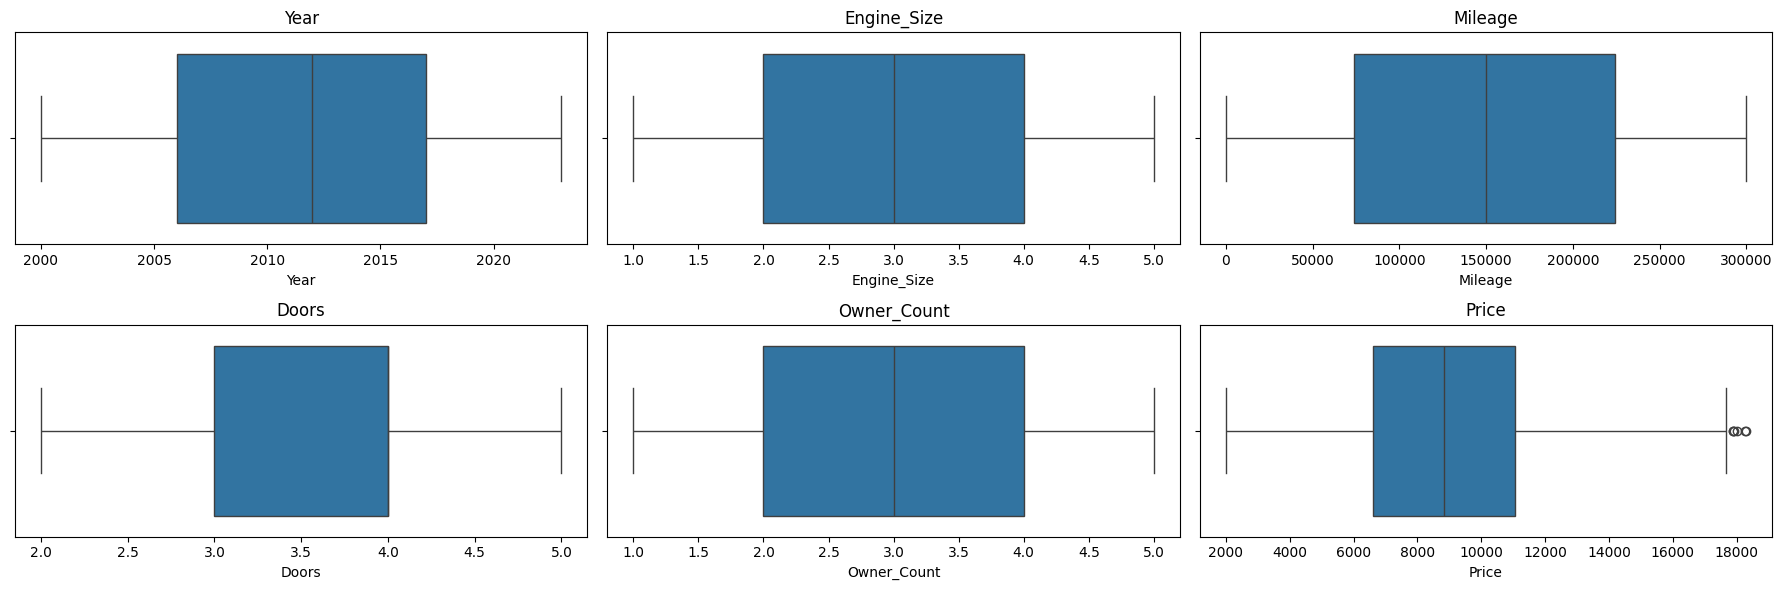

In [3]:
def box_plot(columns):
    '''
    box_plot = This function draws a box plot to visualize the outliers
    of a numerical column in a DataFrame
    '''
    fig, axes = plt.subplots(2, 3, figsize=(18,6))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f'{col}')

    plt.tight_layout()
    plt.show()

box_plot(numerical_columns[:6])

#### insights

- as we can see, data doesn't contain much outliers. We have also seen this when we plot the kde plot for this columns.

## Categorical Encoding

### Mean-Target Encoding

Since `Brand` and `Model` has many unique values(high cardinality), we use Mean-Target Encoding for them

- Calculate the Mean Target(Price) for each category
- Replace category in with its corresponding Mean Price

In [4]:
# Brand Encoding
brand_mean_price = df.groupby('Brand')['Price'].mean()
df['Brand'] = df['Brand'].map(brand_mean_price)

# Model Encoding
model_mean_price = df.groupby('Model')['Price'].mean()
df['Model'] = df['Model'].map(model_mean_price)

# Drop label columns
# df.drop(['Brand', 'Model'], axis=1, inplace=True)

In [5]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9254,8901.128019,8782.205323,2007,3.2,Hybrid,Semi-Automatic,33948,5,4,9721
1561,8650.208122,8604.644689,2010,4.8,Electric,Semi-Automatic,224853,2,1,9402
1670,8780.323961,8729.062044,2006,1.9,Hybrid,Semi-Automatic,13435,3,5,8531
6087,8585.052045,8640.753036,2019,1.7,Diesel,Semi-Automatic,199846,2,3,7503
6669,8892.547554,8934.714859,2005,3.6,Petrol,Automatic,261,3,2,10694


In [6]:
## saving it for future usage

# Brand Encoder
with open('../../models/Brand_Encoder.pkl', 'wb') as f:
    pickle.dump(brand_mean_price, f)

# Model Encoder
with open('../../models/Model_Encoder.pkl', 'wb') as f:
    pickle.dump(model_mean_price, f)

### One-Hot Encoding

`Transmission` and `Fuel` has less cardinality. so we use One-Hot Encoding

In [7]:
# select categorical columns to encode
cat_columns = ['Transmission', 'Fuel_Type']

# define OneHot encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# fit and transform only selected categorical columns
encoded_array = encoder.fit_transform(df[cat_columns])

# convert to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_columns), index=df.index)
# encoded_df

# drop original columns and merge encoded ones
df_encoded = df.drop(columns=cat_columns)
df = pd.concat([df_encoded, encoded_df], axis=1)

In [8]:
df.head()

,Brand,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
9254,8901.128019,8782.205323,2007,3.2,33948,5,4,9721,0.0,1.0,0.0,1.0,0.0
1561,8650.208122,8604.644689,2010,4.8,224853,2,1,9402,0.0,1.0,1.0,0.0,0.0
1670,8780.323961,8729.062044,2006,1.9,13435,3,5,8531,0.0,1.0,0.0,1.0,0.0
6087,8585.052045,8640.753036,2019,1.7,199846,2,3,7503,0.0,1.0,0.0,0.0,0.0
6669,8892.547554,8934.714859,2005,3.6,261,3,2,10694,0.0,0.0,0.0,0.0,1.0


In [9]:
# OneHot Encoder
with open('../../models/OneHot_Encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

## Checkpoint

In [10]:
%store df

Stored 'df' (DataFrame)


In [11]:
train_columns = df.drop('Price', axis=1).columns
%store train_columns

Stored 'train_columns' (Index)
